In [1]:
import numpy as np
import torch

In [2]:
import sys
sys.path.append('/Users/mehdi/github/pipeline')

In [3]:
from sysnet.sources import DNN

  pip install torch-lr-finder -v --global-option="amp"


In [4]:
from sysnet.sources import LoadData

In [5]:
dt = LoadData('../input/eBOSS.ELG.NGC.DR7.table.fits')

In [6]:
data = dt.load_data()

In [7]:
for d,t in data[0]['train']:
    print(d, t, d.shape, t.shape)
    break

tensor([[-0.1916, -0.0104, -0.1907,  ..., -0.1895, -0.4503, -1.4228],
        [ 1.2265,  1.4924,  2.5633,  ...,  1.2916,  0.4780,  1.3431],
        [-1.2762, -2.6351, -0.8493,  ...,  1.1515,  0.9863,  1.0025],
        ...,
        [ 1.7230,  1.2373,  2.2340,  ..., -0.6297, -0.9269, -0.2813],
        [-0.2626,  0.7166, -0.6996,  ..., -1.7960, -1.5927, -1.1112],
        [-0.7115, -1.4234, -0.3404,  ..., -0.2232, -0.4869,  0.2634]]) tensor([[ 0.0597],
        [ 0.0597],
        [ 0.3554],
        ...,
        [-0.2360],
        [ 1.5380],
        [ 0.0597]]) torch.Size([1024, 18]) torch.Size([1024, 1])


my microphone is not working -- it's blinking

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
model = DNN(*(4, 20, 18, 1))
model.load_state_dict(torch.load('../checkpoints/model_test.pt'))

<All keys matched successfully>

In [11]:
model

DNN(
  (fc): ModuleList(
    (0): Linear(in_features=18, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
  (bn): ModuleList(
    (0): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [12]:
fc0_weight = model.fc[0].weight.data.numpy()

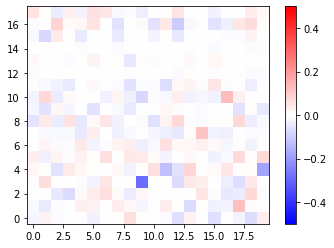

In [13]:
plt.imshow(fc0_weight.T, origin='lower', cmap=plt.cm.bwr, vmin=-0.5, vmax=0.5)#, vmin=-0.3, vmax=0.3)
plt.colorbar()
plt.show()

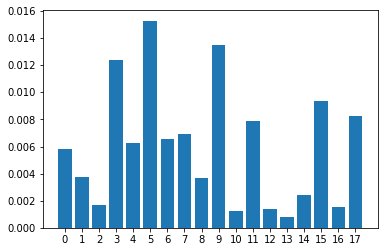

In [19]:
plt.bar(np.arange(18), abs(fc0_weight.mean(axis=0)))
_=plt.xticks(np.arange(18))

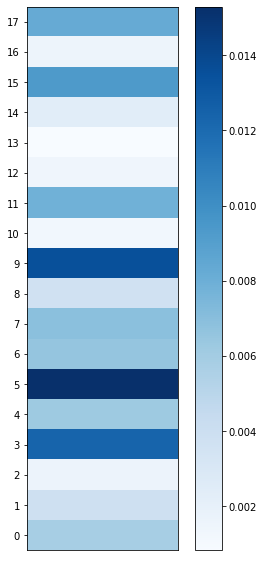

In [14]:
plt.figure(figsize=(6, 10))
plt.imshow(abs(fc0_weight.mean(axis=0)[:, np.newaxis]), 
           cmap=plt.cm.Blues, extent=(0, 5, -0.5, 17.5), origin='lower')
plt.yticks(np.arange(18))
plt.xticks([])
plt.colorbar()

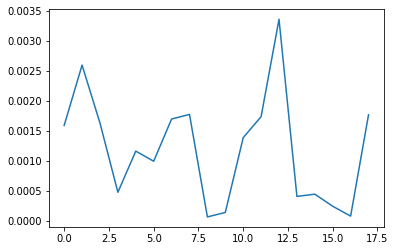

In [11]:
plt.plot(abs(fc0_weight.mean(axis=0)))

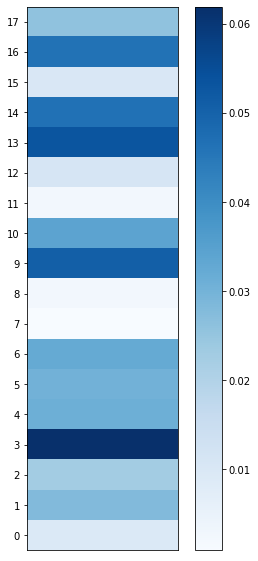

In [12]:
plt.figure(figsize=(6, 10))
plt.imshow(abs(fc0_weight.mean(axis=0)[:, np.newaxis]), 
           cmap=plt.cm.Blues, extent=(0, 5, -0.5, 17.5), origin='lower')
plt.yticks(np.arange(18))
plt.xticks([])
plt.colorbar()